# Test Statistics

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import Imputer
from statsmodels.stats.multicomp import pairwise_tukeyhsd
sns.set()
%matplotlib inline

In [45]:
df = pd.read_csv('./data/ESSdata_Thinkful.csv')

In [46]:
print(f'Shape: {df.shape}')
df.head()

Shape: (8594, 13)


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


## Data cleaning

In [67]:
pd.isnull(df).sum() > 0

cntry      False
idno       False
year       False
tvtot       True
ppltrst     True
pplfair     True
pplhlp      True
happy       True
sclmeet     True
sclact      True
gndr        True
agea        True
partner     True
dtype: bool

In [62]:
df['tvtot'].value_counts()

2.0    1435
4.0    1404
3.0    1393
7.0    1272
5.0    1215
6.0     804
1.0     691
0.0     372
Name: tvtot, dtype: int64

In [60]:
df['tvtot'].median()

4.0

In [70]:
imp_list = df.columns[df.isnull().any()].tolist()
imp_list

['tvtot',
 'ppltrst',
 'pplfair',
 'pplhlp',
 'happy',
 'sclmeet',
 'sclact',
 'gndr',
 'agea',
 'partner']

In [72]:
# For numerical data, impute using mean OR median values
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp = imp.fit(df[imp_list])

# Impute our data
df[imp_list] = imp.transform(df[imp_list])

In [77]:
pd.isnull(df).sum() > 0

cntry      False
idno       False
year       False
tvtot      False
ppltrst    False
pplfair    False
pplhlp     False
happy      False
sclmeet    False
sclact     False
gndr       False
agea       False
partner    False
dtype: bool

In [73]:
df['year'].value_counts()

7    4297
6    4297
Name: year, dtype: int64

In [75]:
# years
# 6 -> 2012
# 7 -> 2014
df_2012 = df[df['year'] == 6]
df_2014 = df[df['year'] == 7]

## Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

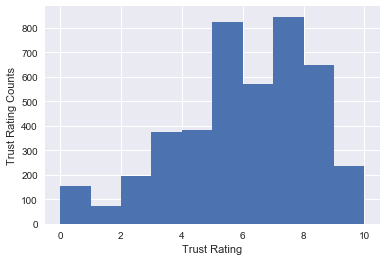

In [92]:
_ = plt.hist(df_2012['ppltrst'])
_ = plt.xlabel('Trust Rating')
_ = plt.ylabel('Trust Rating Counts')
plt.show()

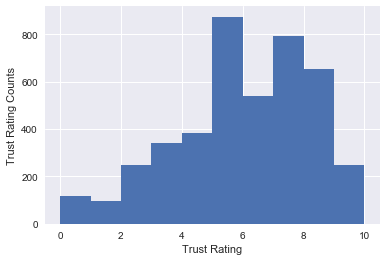

In [91]:
_ = plt.hist(df_2014['ppltrst'])
_ = plt.xlabel('Trust Rating')
_ = plt.ylabel('Trust Rating Counts')
plt.show()

In [111]:
stats.shapiro(df_2014['ppltrst'])

(0.9583837985992432, 2.1009937466613067e-33)

In [82]:
print(stats.ttest_rel(df_2014['ppltrst'], df_2012['ppltrst']))

Ttest_relResult(statistic=-0.1513281783069418, pvalue=0.8797239474781275)


These are dependant groups so I used a paired ttest.  These are not significantly different.

## Did people become happier from 2012 to 2014? Compute results for each country in the sample.

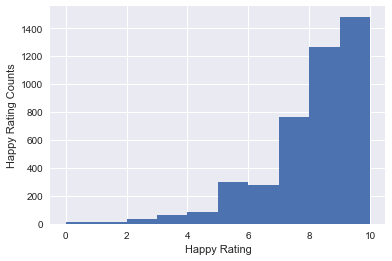

In [93]:
# sns.swarmplot(x='year', y='happy', data=df)
_ = plt.hist(df_2012['happy'])
_ = plt.xlabel('Happy Rating')
_ = plt.ylabel('Happy Rating Counts')
plt.show()

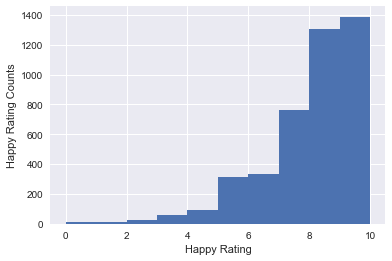

In [94]:
_ = plt.hist(df_2014['happy'])
_ = plt.xlabel('Happy Rating')
_ = plt.ylabel('Happy Rating Counts')
plt.show()

In [119]:
print(stats.wilcoxon(df_2014['happy'], df_2012['happy']))

WilcoxonResult(statistic=2936643.0, pvalue=0.034305851328279506)


The happy feature is not normally distributed so I used the Wilcoxon test.  The difference between the 2 years seem statistically significant.

## Who reported watching more TV in 2012, men or women?

In [101]:
# 1 -> male
# 2 -> female
df_2012['gndr'].value_counts()

1.0    2154
2.0    2143
Name: gndr, dtype: int64

In [141]:
df_2012[df_2012['gndr'] == 1]['tvtot'].value_counts()

3.0    374
2.0    346
4.0    339
5.0    324
7.0    309
6.0    213
1.0    174
0.0     75
Name: tvtot, dtype: int64

In [140]:
df_2012[df_2012['gndr'] == 2]['tvtot'].value_counts()

4.0    362
7.0    353
2.0    334
3.0    331
5.0    295
6.0    205
1.0    168
0.0     95
Name: tvtot, dtype: int64

In [143]:
print(f'Dot product male: {np.dot(df_2012[df_2012["gndr"] == 1]["tvtot"].value_counts(), df_2012[df_2012["gndr"] == 1]["tvtot"].value_counts().index)}')
print(f'Dot product female: {np.dot(df_2012[df_2012["gndr"] == 2]["tvtot"].value_counts(), df_2012[df_2012["gndr"] == 2]["tvtot"].value_counts().index)}')

Dot product male: 8405.0
Dot product female: 8453.0


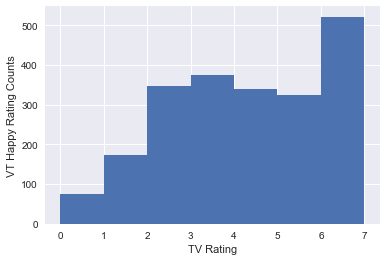

In [185]:
_ = plt.hist(df_2012[df_2012['gndr'] == 1]['tvtot'], bins=7)
_ = plt.xlabel('TV Rating')
_ = plt.ylabel('VT Happy Rating Counts')
plt.show()

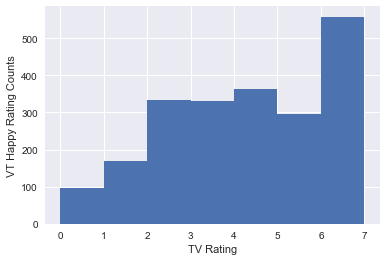

In [184]:
_ = plt.hist(df_2012[df_2012['gndr'] == 2]['tvtot'], bins=7)
_ = plt.xlabel('TV Rating')
_ = plt.ylabel('VT Happy Rating Counts')
plt.show()

In [128]:
df[df['gndr'] == 1].shape

(4326, 13)

In [130]:
print(stats.kruskal(df_2012[df_2012['gndr'] == 1]['tvtot'], df_2012[df_2012['gndr'] == 2]['tvtot']))

MannwhitneyuResult(statistic=2277450.5, pvalue=0.2237635506897072)


While the female group appear to have watched slightly more TV than the men (total hours), the difference is not statistically significant.

## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [163]:
# 1 -> Lives with parnter
# 2 -> Does not
df_2012[df_2012['partner'] == 1]['pplfair'].mean()

6.082431928384931

In [162]:
df_2012[df_2012['partner'] == 2]['pplfair'].mean()

5.857673267326732

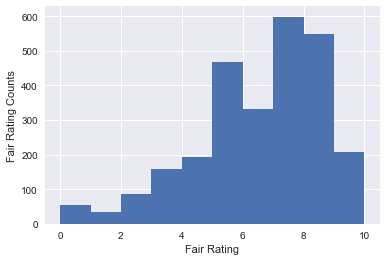

In [153]:
_ = plt.hist(df_2012[df_2012['partner'] == 1]['pplfair'])
_ = plt.xlabel('Fair Rating')
_ = plt.ylabel('Fair Rating Counts')
plt.show()

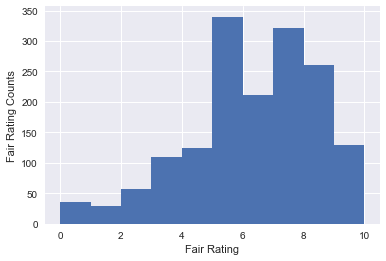

In [154]:
_ = plt.hist(df_2012[df_2012['partner'] == 2]['pplfair'])
_ = plt.xlabel('Fair Rating')
_ = plt.ylabel('Fair Rating Counts')
plt.show()

In [166]:
print(stats.ttest_ind(df_2012[df_2012['partner'] == 1]['pplfair'], df_2012[df_2012['partner'] == 2]['pplfair']))

Ttest_indResult(statistic=3.3526650393131754, pvalue=0.0008073002028865902)


In [167]:
print(stats.kruskal(df_2012[df_2012['partner'] == 1]['pplfair'], df_2012[df_2012['partner'] == 2]['pplfair']))

KruskalResult(statistic=14.02005857012386, pvalue=0.00018087084877865917)


The mean ranked trust was higher  among those of those who did not live a partner vs those who did live with a partner and the difference is statistically significant.

## Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [169]:
# CH - Switzerland
# NO - Norway
# CZ - Czech Republic
df_2014['cntry'].value_counts()

ES    1213
SE     908
CH     773
NO     731
CZ     658
DE      14
Name: cntry, dtype: int64

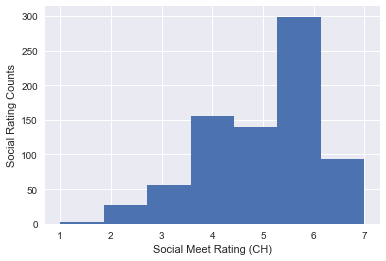

In [182]:
# sclmeet
_ = plt.hist(df_2014[df_2014['cntry'] == 'CH']['sclmeet'], bins=7)
_ = plt.xlabel('Social Meet Rating (CH)')
_ = plt.ylabel('Social Rating Counts')
plt.show()

In [235]:
df_2014[df_2014['cntry'] == 'CH']['sclmeet'].mean()

5.161707632600259

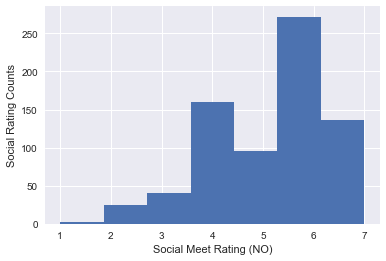

In [183]:
_ = plt.hist(df_2014[df_2014['cntry'] == 'NO']['sclmeet'], bins=7)
_ = plt.xlabel('Social Meet Rating (NO)')
_ = plt.ylabel('Social Rating Counts')
plt.show()

In [234]:
df_2014[df_2014['cntry'] == 'NO']['sclmeet'].mean()

5.3023255813953485

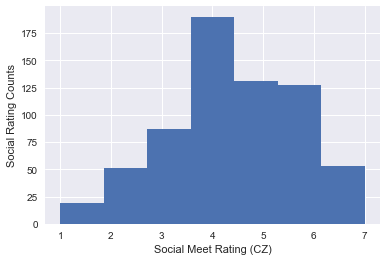

In [181]:
_ = plt.hist(df_2014[df_2014['cntry'] == 'CZ']['sclmeet'], bins=7)
_ = plt.xlabel('Social Meet Rating (CZ)')
_ = plt.ylabel('Social Rating Counts')
plt.show()

In [237]:
df_2014[df_2014['cntry'] == 'CZ']['sclmeet'].mean()

4.452887537993921

In [195]:
F, p = stats.f_oneway(
    df_2014[df_2014['cntry'] == 'CH']['sclmeet'],
    df_2014[df_2014['cntry'] == 'NO']['sclmeet'],
    df_2014[df_2014['cntry'] == 'CZ']['sclmeet'])

print(f'F: {F}')
print(f'P: {p}\n')

# NEED to run ANOVA
F, p = stats.kruskal(
    df_2014[df_2014['cntry'] == 'CH']['sclmeet'],
    df_2014[df_2014['cntry'] == 'NO']['sclmeet'],
    df_2014[df_2014['cntry'] == 'CZ']['sclmeet'])

print(f'F: {F}')
print(f'P: {p}')

F: 74.93060154431821
P: 3.4496424208807813e-32

F: 136.13719678150682
P: 2.7427317123707865e-30


In [233]:
sclmeets=np.asarray(
    df_2014[df_2014['cntry'] == 'CH']['sclmeet'].tolist() +
    df_2014[df_2014['cntry'] == 'NO']['sclmeet'].tolist() +
    df_2014[df_2014['cntry'] == 'CZ']['sclmeet'].tolist())

a = np.append(df_2014[df_2014['cntry'] == 'CH']['cntry'], df_2014[df_2014['cntry'] == 'NO']['cntry'])
countries = np.append(a, df_2014[df_2014['cntry'] == 'CZ']['cntry'])


tukey = pairwise_tukeyhsd(endog=sclmeets,      # Data
                          groups=countries,   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()  

group1,group2,meandiff,lower,upper,reject
CH,CZ,-0.7088,-0.88,-0.5376,True
CH,NO,0.1406,-0.0259,0.3072,False
CZ,NO,0.8494,0.676,1.0229,True


Norway had the highest level of people who met socially.  Switzerland and Norway are the most similar.

## Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [243]:
df_2014[df_2014['cntry'] == 'CH']['sclact'].value_counts()

3.0    355
2.0    213
4.0    120
1.0     61
5.0     24
Name: sclact, dtype: int64

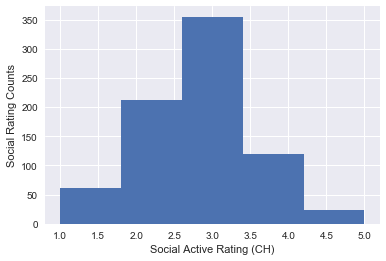

In [244]:
# sclact
_ = plt.hist(df_2014[df_2014['cntry'] == 'CH']['sclact'], bins=5)
_ = plt.xlabel('Social Active Rating (CH)')
_ = plt.ylabel('Social Rating Counts')
plt.show()

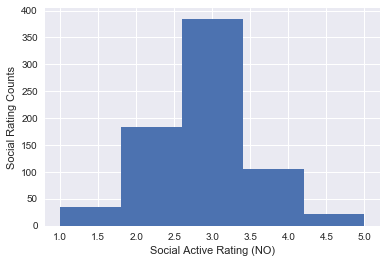

In [245]:
# sclact
_ = plt.hist(df_2014[df_2014['cntry'] == 'NO']['sclact'], bins=5)
_ = plt.xlabel('Social Active Rating (NO)')
_ = plt.ylabel('Social Rating Counts')
plt.show()

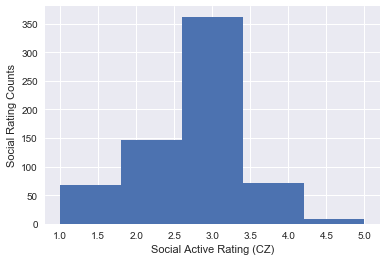

In [246]:
# sclact
_ = plt.hist(df_2014[df_2014['cntry'] == 'CZ']['sclact'], bins=5)
_ = plt.xlabel('Social Active Rating (CZ)')
_ = plt.ylabel('Social Rating Counts')
plt.show()

In [247]:
F, p = stats.f_oneway(
    df_2014[df_2014['cntry'] == 'CH']['sclact'],
    df_2014[df_2014['cntry'] == 'NO']['sclact'],
    df_2014[df_2014['cntry'] == 'CZ']['sclact'])

print(f'F: {F}')
print(f'P: {p}\n')

F: 5.396989949095493
P: 0.004591522788599627



There is a statistically significant difference between the 3 countries.

In [250]:
sclacts=np.asarray(
    df_2014[df_2014['cntry'] == 'CH']['sclact'].tolist() +
    df_2014[df_2014['cntry'] == 'NO']['sclact'].tolist() +
    df_2014[df_2014['cntry'] == 'CZ']['sclact'].tolist())

a = np.append(df_2014[df_2014['cntry'] == 'CH']['cntry'], df_2014[df_2014['cntry'] == 'NO']['cntry'])
countries = np.append(a, df_2014[df_2014['cntry'] == 'CZ']['cntry'])


tukey = pairwise_tukeyhsd(endog=sclacts,      # Data
                          groups=countries,   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()  

group1,group2,meandiff,lower,upper,reject
CH,CZ,-0.0773,-0.1847,0.0301,False
CH,NO,0.0751,-0.0293,0.1796,False
CZ,NO,0.1524,0.0436,0.2612,True


It appears that there is only a significant difference between the Czech Republic and Norway.